In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [2]:
# Set the paths to the directories
base_dir = "dataset/mini_testdatensatz"
train_dir = os.path.join(base_dir, "train")
seg_dir = os.path.join(base_dir, "segmentation_images")

# Initialize variables for the means of the entire image and masked region
mean_image = np.zeros((3,))
mean_masked = np.zeros((3,))
num_masked_pixels = 0

color_list = [[],[],[],[],[]]

# Loop through each image in the train folder
for filename in os.listdir(train_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
    
        # Open the image and its corresponding segmentation mask
        img_path = os.path.join(train_dir, filename)
        seg_path = os.path.join(seg_dir, filename)
        img = Image.open(img_path)
        seg = Image.open(seg_path).convert("1")

        # Convert the segmentation mask to a binary numpy array
        seg_array = np.array(seg)
        img_array = np.array(img)

        mean = [[],[],[]]
        for channel in range(3):
            values = img_array[:,:,channel][seg_array == 1] # Get the values of pixels where the mask is 1 for the current channel
            mean[channel] = np.mean(values) if len(values) > 0 else 0 # Calculate the mean of the values if there are any

        color_list[0].append(filename)
        color_list[1].append(mean[0]) # red
        color_list[2].append(mean[1]) # green
        color_list[3].append(mean[2]) # blue
        color_list[4].append(np.mean(mean)) # rgb
            

print("Mittlerer Rot-Wert für alle Bilder:",np.mean(color_list[1]))
print("Mittlerer Grün-Wert für alle Bilder:",np.mean(color_list[2]))
print("Mittlerer Blau-Wert für alle Bilder:",np.mean(color_list[3]))
print("Mittlerer RGB-Wert für alle Bilder:",np.mean(color_list[4]))

Mittlerer Rot-Wert für alle Bilder: 78.41524856239795
Mittlerer Grün-Wert für alle Bilder: 80.47318550682039
Mittlerer Blau-Wert für alle Bilder: 73.50496644887079
Mittlerer RGB-Wert für alle Bilder: 77.46446683936304


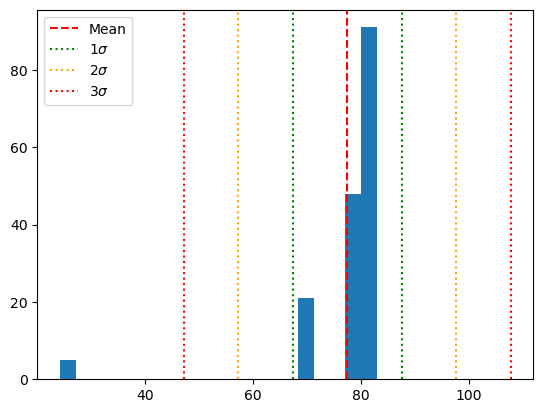

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
data = color_list[4]

# Create a histogram with 20 bins
plt.hist(data, bins=20)

# Calculate the mean and standard deviation
mean = np.mean(data)
std = np.std(data)

# Plot the mean as a vertical line
plt.axvline(mean, color='r', linestyle='--', label='Mean')

# Plot the one, two, and three standard deviation lines
plt.axvline(mean + std, color='g', linestyle=':', label='1$\sigma$')
plt.axvline(mean - std, color='g', linestyle=':')
plt.axvline(mean + 2*std, color='orange', linestyle=':', label='2$\sigma$')
plt.axvline(mean - 2*std, color='orange', linestyle=':')
plt.axvline(mean + 3*std, color='r', linestyle=':', label='3$\sigma$')
plt.axvline(mean - 3*std, color='r', linestyle=':')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [4]:
base_dir_copy = base_dir + "_cleared"

if os.path.exists(base_dir_copy):
    shutil.rmtree(base_dir_copy)

shutil.copytree(base_dir, base_dir_copy)

'dataset/mini_testdatensatz_cleared'

In [5]:
sd = 2

train_dir_copy = os.path.join(base_dir_copy, "train")
seg_dir_copy = os.path.join(base_dir_copy, "segmentation_images")

mean = np.mean(color_list[4])
std_dev = np.std(color_list[4])
threshold = sd * std_dev

for i in range(len(color_list[4])):
    if color_list[4][i] < mean - threshold or color_list[4][i] > mean + threshold:
        os.remove(os.path.join(train_dir_copy, color_list[0][i]))
        print("Das Bild: ",os.path.join(train_dir_copy, color_list[0][i])," wurde entfernt.")
        os.remove(os.path.join(seg_dir_copy, color_list[0][i]))
        print("Das Bild: ",os.path.join(seg_dir_copy, color_list[0][i])," wurde entfernt.")

Das Bild:  dataset/mini_testdatensatz_cleared/train/picture_8275.png  wurde entfernt.
Das Bild:  dataset/mini_testdatensatz_cleared/segmentation_images/picture_8275.png  wurde entfernt.
Das Bild:  dataset/mini_testdatensatz_cleared/train/picture_8276.png  wurde entfernt.
Das Bild:  dataset/mini_testdatensatz_cleared/segmentation_images/picture_8276.png  wurde entfernt.
Das Bild:  dataset/mini_testdatensatz_cleared/train/picture_8278.png  wurde entfernt.
Das Bild:  dataset/mini_testdatensatz_cleared/segmentation_images/picture_8278.png  wurde entfernt.
Das Bild:  dataset/mini_testdatensatz_cleared/train/picture_8279.png  wurde entfernt.
Das Bild:  dataset/mini_testdatensatz_cleared/segmentation_images/picture_8279.png  wurde entfernt.
Das Bild:  dataset/mini_testdatensatz_cleared/train/picture_8277.png  wurde entfernt.
Das Bild:  dataset/mini_testdatensatz_cleared/segmentation_images/picture_8277.png  wurde entfernt.
